In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,r2_score,roc_curve, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV, KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')




In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [3]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [4]:
df.shape

(907, 27)

There are 907 rows and 27 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

Few columns are numeric and few are categirical

# checking for null values

In [7]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are many null values in dataset. 

Dropping unnecessary column

In [8]:
df=df.drop(['other_fuel3'], axis=1)
df=df.drop(['wepp_id'], axis=1)
df=df.drop(['generation_gwh_2013'], axis=1)
df=df.drop(['generation_gwh_2019'], axis=1)
df=df.drop(['estimated_generation_gwh'], axis=1)
df=df.drop(['other_fuel2'], axis=1)



checking the unique values of each column

In [9]:
df.nunique()

country                     1
country_long                1
name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
year_of_capacity_data       1
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

The above are the number od unique values present in each column

Also, we can see that the columns country, country_long, year_of_capacity_data,generation_data_source has only one unique 
value and all the column is filled with null values. Hence, we can drop these as well

In [10]:
df=df.drop(['country'], axis=1)
df=df.drop(['country_long'], axis=1)
df=df.drop(['year_of_capacity_data'], axis=1)
df=df.drop(['generation_data_source'], axis=1)

In [11]:
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


CHecking the column entries

In [12]:
df['name'].value_counts()

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

The column 'name' has unique names for each power plane hence, we can drop it

Similary for gppd_idnr

In [13]:
df['gppd_idnr'].value_counts()

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

Hence, we can drop this as well as it is having unique value and it will not contribute towards model training

In [14]:
df['owner'].value_counts()

Acc Acc ltd                                                    4
Sterling Agro Industries ltd.                                  4
Jk Cement ltd                                                  4
SWPPL                                                          3
Jaypee Ltd jccl)                                               3
                                                              ..
Sunkon Energy Private Limited                                  1
West Bengal Energy Development Corporation Limited (WBEDCL)    1
Energy Infratech Private Limited                               1
K. N. Ram                                                      1
iEnergy Wind Farms                                             1
Name: owner, Length: 280, dtype: int64

We can drop owner column as well, because keping this will not contribute anything towards model training.

In [15]:
df['url'].value_counts()

http://www.cea.nic.in/                                                              519
http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.pdf                       7
http://www.ntpc.co.in                                                                 6
http://viainfotech.biz/Biomass/theme5/document/green_market/REC-project-list.pdf      5
http://www.mahaurja.com/PDF/PG2_GridConnSPPCommissioned.pdf                           4
                                                                                   ... 
https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1346322352.66/view                       1
https://cdm.unfccc.int/Projects/DB/DNV-CUK1351166669.28/view                          1
http://harshaengineers.com                                                            1
http://hiragroup.com/companies/godawari-green-energy-limited/                         1
https://cdm.unfccc.int/Projects/DB/RWTUV1345031355.85/view                            1
Name: url, Length: 304, dtype: i

We can drop this column as well, because keping this will not contribute anything towards model training.

In [16]:
df=df.drop(['name'], axis=1)
df=df.drop(['gppd_idnr'], axis=1)
df=df.drop(['url'], axis=1)
df=df.drop(['owner'], axis=1)

In [17]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [18]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

There are null values in all the columns except capacity_mw ,primary_fuel and source 

# Plotting Heatmap for null values

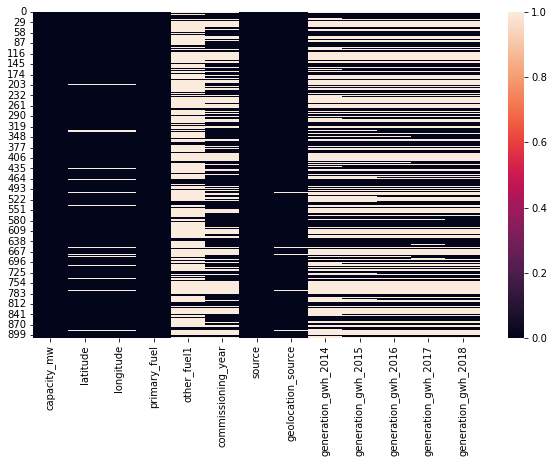

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.show()

In [20]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

All the  columns are skewed except latitude

# Feature Engineering

extracting poer plant age from comissioning year by subtracting from 2019. Thinking power plant age may contribute
 more to our prediction

In [21]:
df['power_plant_age']=2019-df['commissioning_year']
df.drop(columns=['commissioning_year'], inplace=True)

# Treating null values use imputation techniques

Replaing null values in numerical columns with mode

In [22]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['power_plant_age']=df['power_plant_age'].fillna(df['power_plant_age'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())



Replaing null values in categorical columns with mode


In [24]:
#Replacing null values in categorical columns
df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])
df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [25]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
power_plant_age        0
dtype: int64

In [26]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# Checking unique values for Target columns

In [27]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

These are unique values present in the target column

In [28]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

# Checking for Empty Observations

In [29]:
df.loc[df['primary_fuel']== " "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age


In [30]:
df.loc[df['capacity_mw']== " "]

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age


Hence, there are no empty obsevartions in both target values

# Description of Dataset

In [31]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,20.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,16.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,18.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,92.000000


All the null values has beed removed

The mean is more than median in all the columns which means they are skewed to right

In some columns differece is more between max and 75%, hence outliers are present

# checking for categorical columns

In [32]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)
    

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


Hence these are the categorical columns in the given set

# Simlarly checking for numeric columns

In [33]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)
    

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'power_plant_age']


These are the numeric columns

# Data Visualization

Univariate Analysis: Plotting categirical columns

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


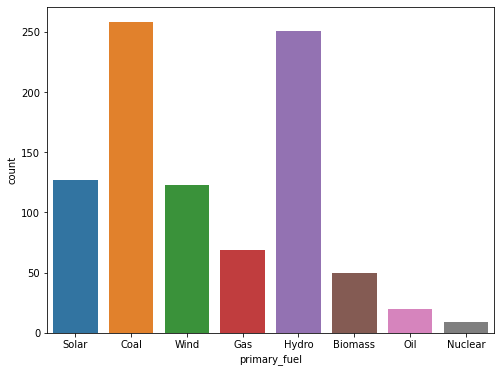

In [34]:
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["primary_fuel"])
plt.show()

from the plot we can see the most of the plants in india uses Coal and Hydro as fuel

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


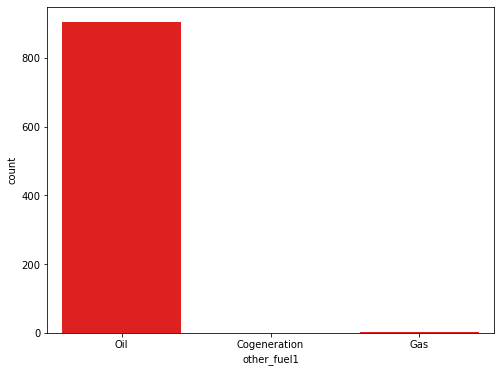

In [35]:
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df["other_fuel1"],color='red')
plt.show()

Plants in India used oil as other fuels

plotting numeric values

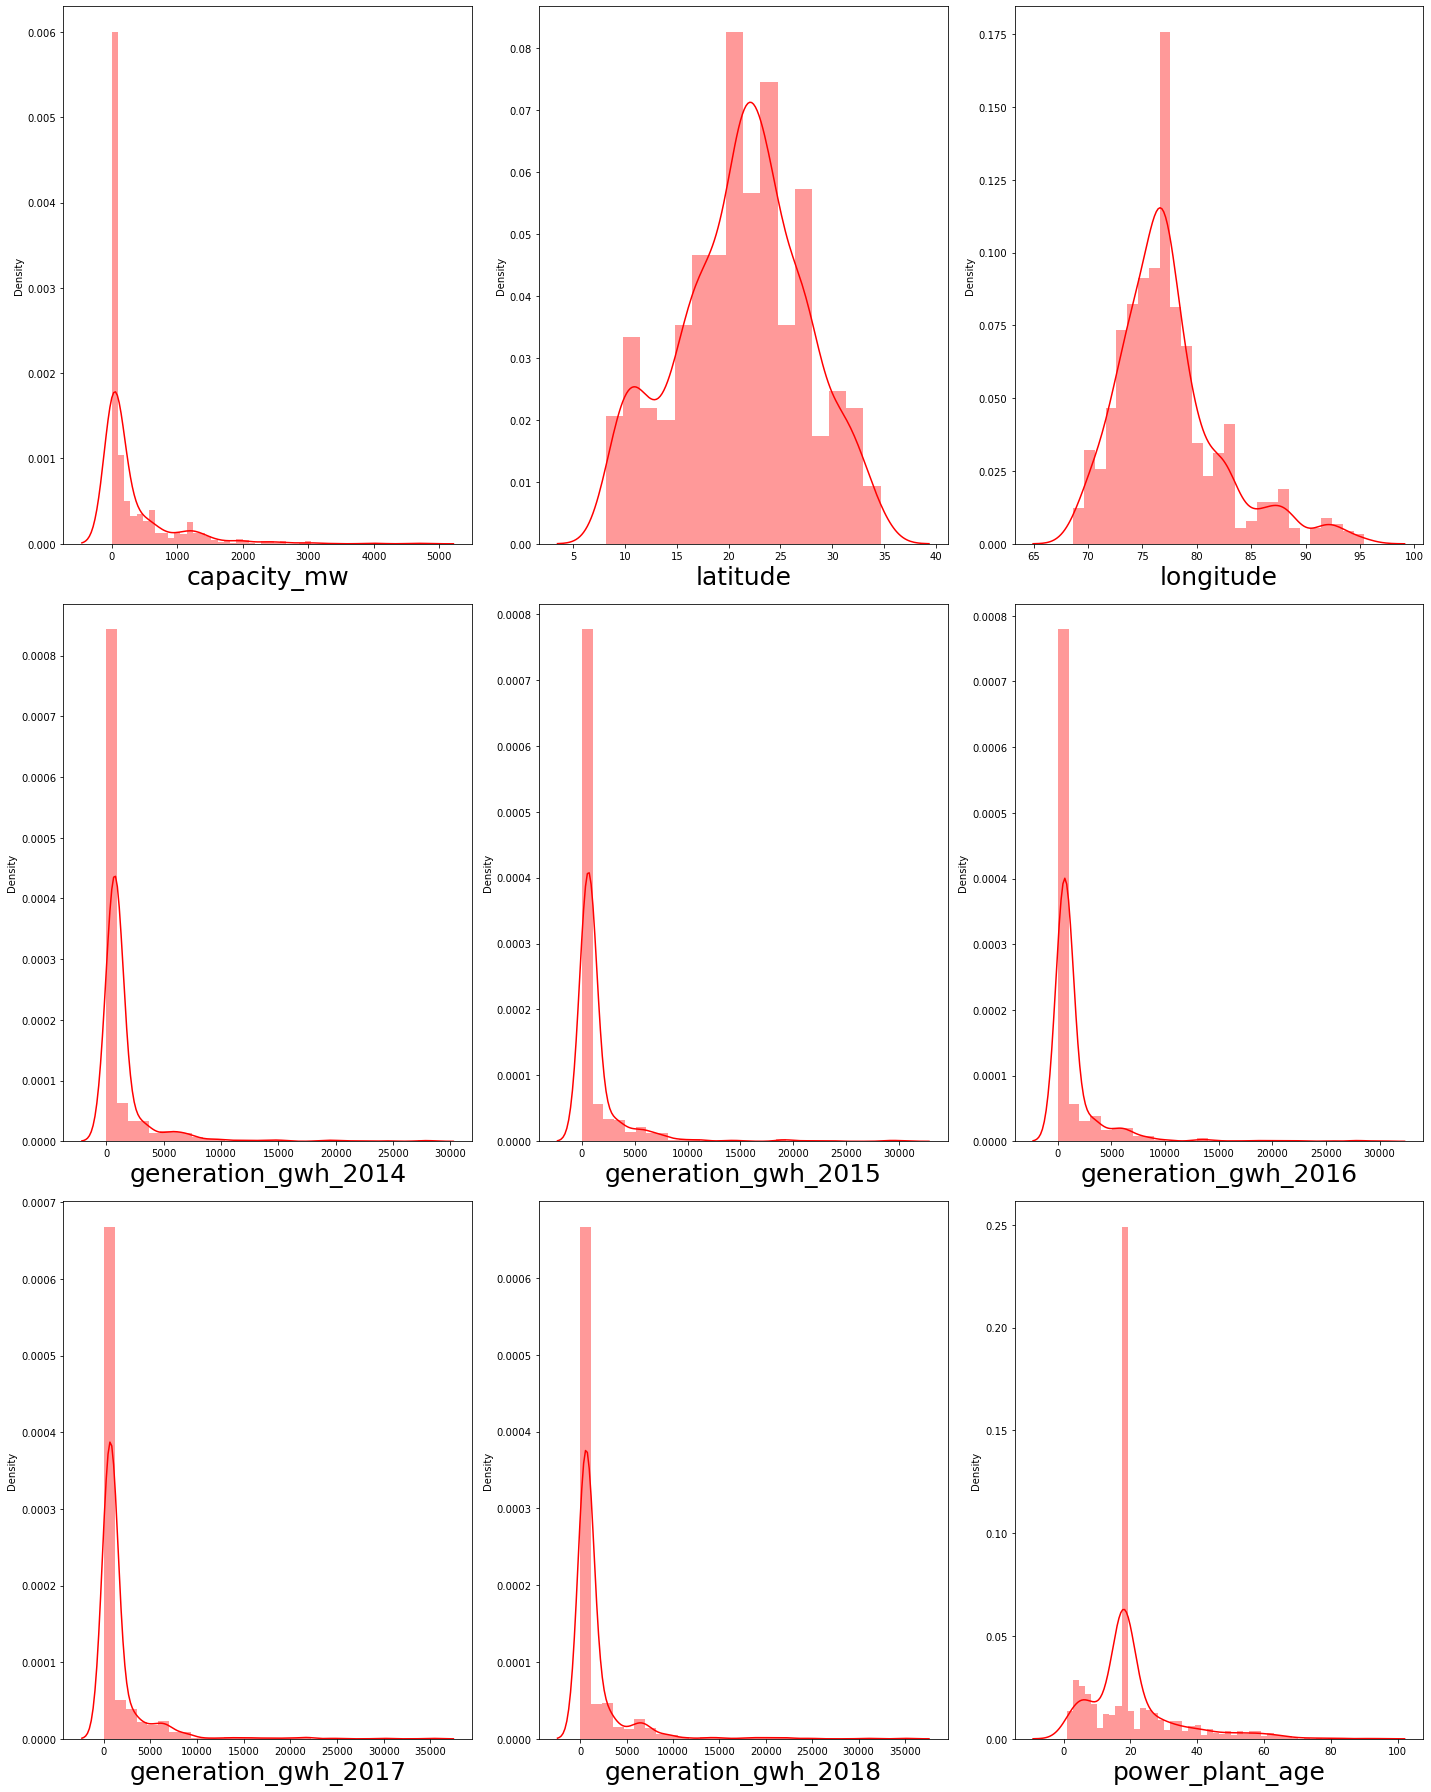

In [36]:
plt.figure(figsize=(20,25), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(df[column], color='red')
        plt.xlabel(column, fontsize=25)
        
        
    plotnumber +=1
plt.tight_layout()

# Bivariate Analysis

<AxesSubplot:title={'center':'comparision between latitude and primary_fuel'}, xlabel='primary_fuel', ylabel='latitude'>

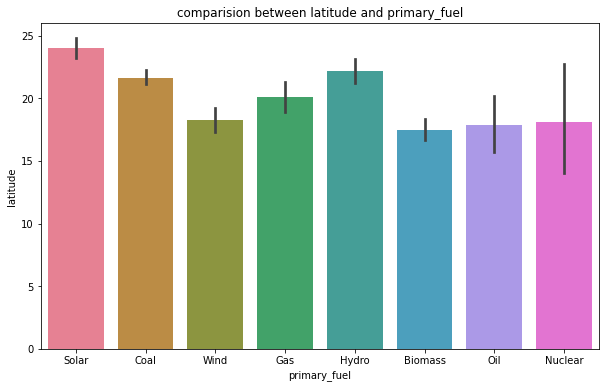

In [37]:
plt.figure(figsize=[10,6])
plt.title('comparision between latitude and primary_fuel')
sns.barplot(df['primary_fuel'], df['latitude'],palette="husl")

Solar has high latitude followed by other fuels

<AxesSubplot:xlabel='primary_fuel', ylabel='geolocation_source'>

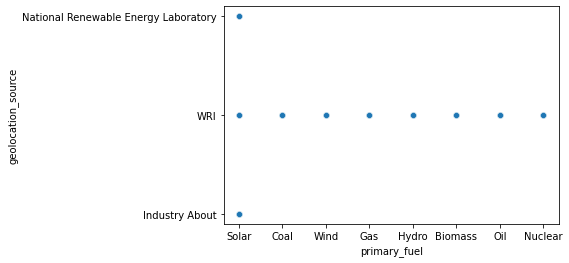

In [38]:
sns.scatterplot(x='primary_fuel', y='geolocation_source', data=df)

geolocation_source=WRI has all the types of fuels, and National Renewal Energy has one solar as fuel

<AxesSubplot:title={'center':'comparision between primary_fuel and power plant age'}, xlabel='primary_fuel', ylabel='power_plant_age'>

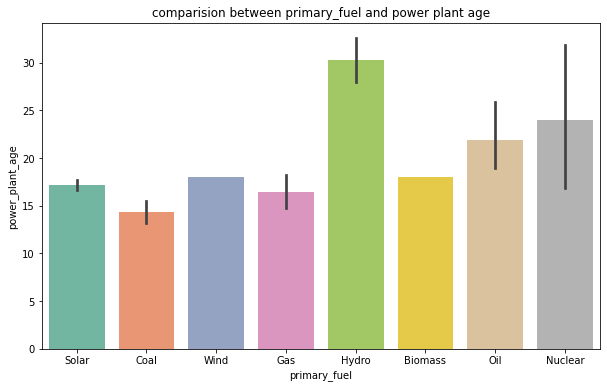

In [39]:
plt.figure(figsize=[10,6])
plt.title('comparision between primary_fuel and power plant age')
sns.barplot(df['primary_fuel'], df['power_plant_age'],palette="Set2")

Hydro Nulear and Oil are Old power Plant and others are recently added

<AxesSubplot:title={'center':'comparision between longitude and primary_fuel'}, xlabel='primary_fuel', ylabel='longitude'>

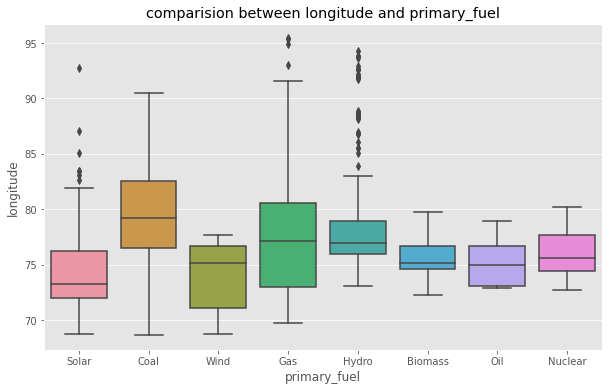

In [40]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('comparision between longitude and primary_fuel')
sns.boxplot(df['primary_fuel'], df['longitude'])

Primary fuel has high longitude followed by Hydro, solar, and coa. Other fule types have very less 

<AxesSubplot:title={'center':'comparision between power_plant_age and capacity_mw'}, xlabel='power_plant_age', ylabel='capacity_mw'>

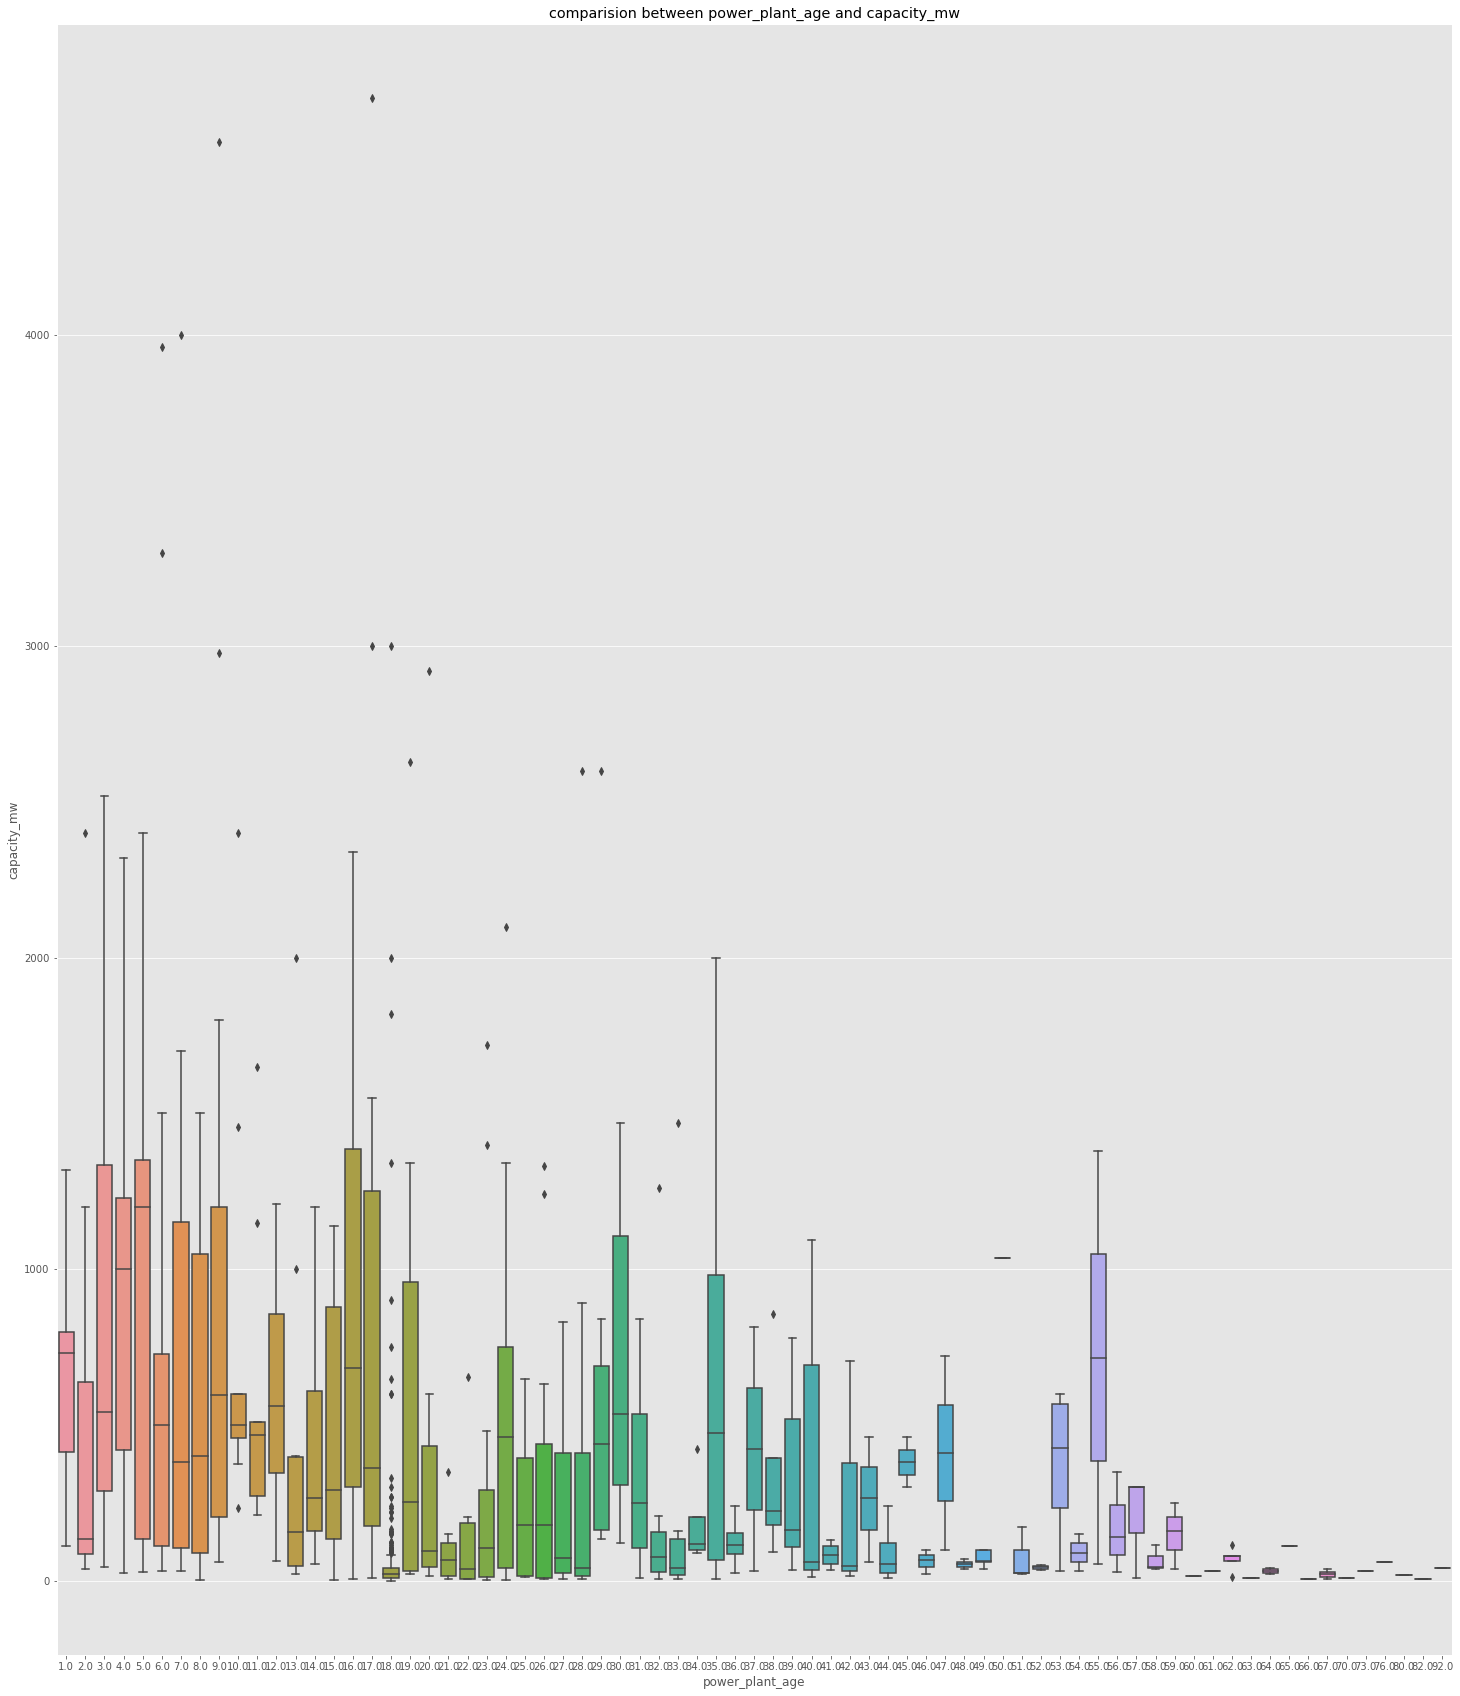

In [41]:
plt.figure(figsize=[25,30])
plt.title('comparision between power_plant_age and capacity_mw')
sns.boxplot(df['power_plant_age'], df['capacity_mw'])

capacity of older power plant is less compare to the recently launced

<AxesSubplot:title={'center':'comparision between generation_gwh_2018 and capacity_mw'}, xlabel='generation_gwh_2018', ylabel='capacity_mw'>

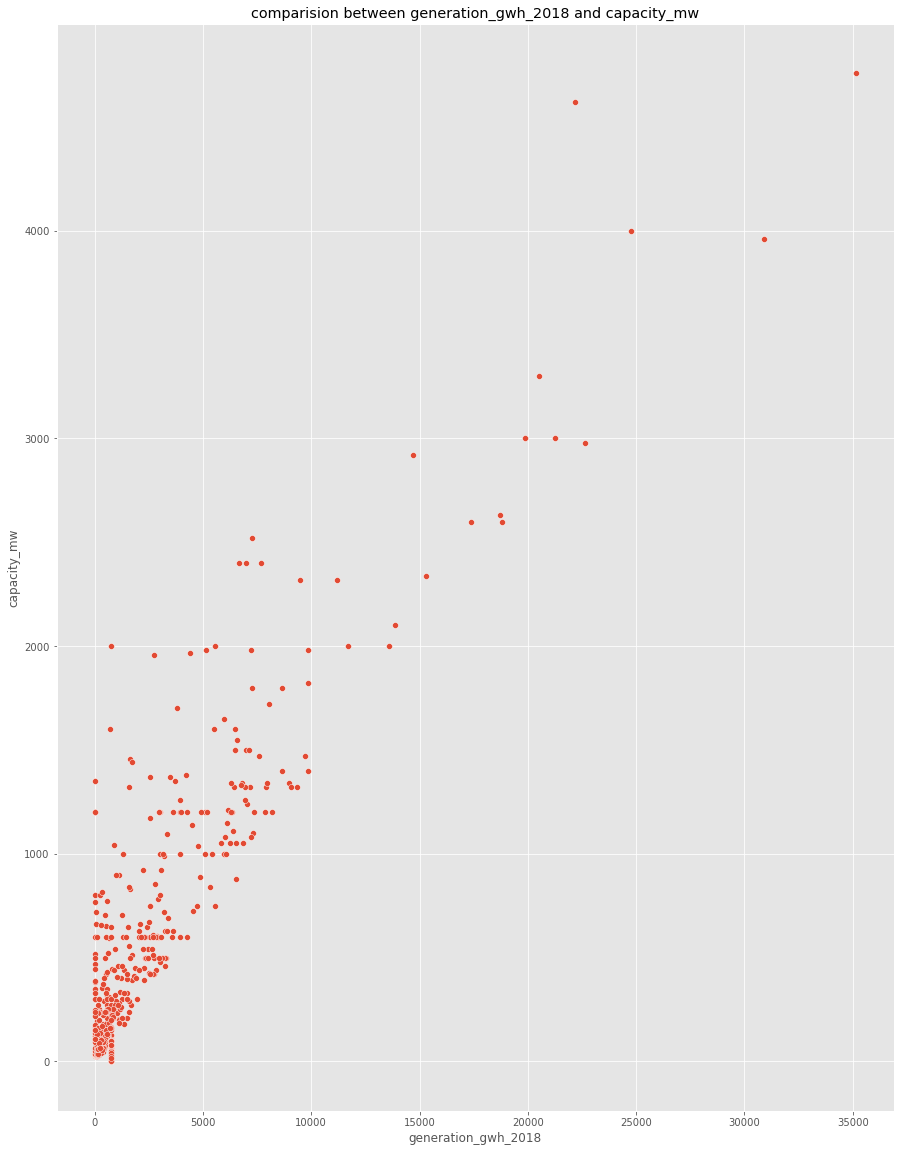

In [42]:
plt.figure(figsize=[15,20])
plt.title('comparision between generation_gwh_2018 and capacity_mw')
sns.scatterplot(df['generation_gwh_2018'], df['capacity_mw'])

The electric generation reported for the year 2018 has capacity above 1000mw. The capacity of the plant is also increasing 
moderately with generation growth increase.

<AxesSubplot:title={'center':'comparision between geolocation_source and capacity_mw'}, xlabel='geolocation_source', ylabel='capacity_mw'>

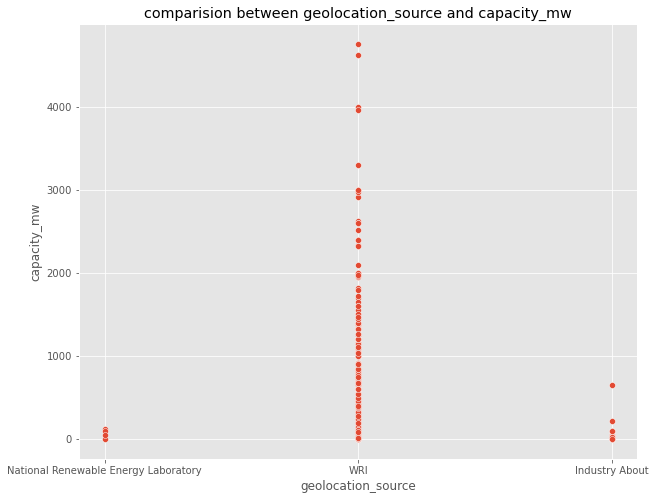

In [43]:
plt.figure(figsize=[10,8])
plt.title('comparision between geolocation_source and capacity_mw')
sns.scatterplot(df['geolocation_source'], df['capacity_mw'])

The capacity of geolocation_source WRI is maximum which has capacity morethan 3500 mw. geolocation_source industry has less 

# Checking the relationship between targets

<AxesSubplot:title={'center':'comparision between primary_fuel and capacity_mw'}, xlabel='primary_fuel', ylabel='capacity_mw'>

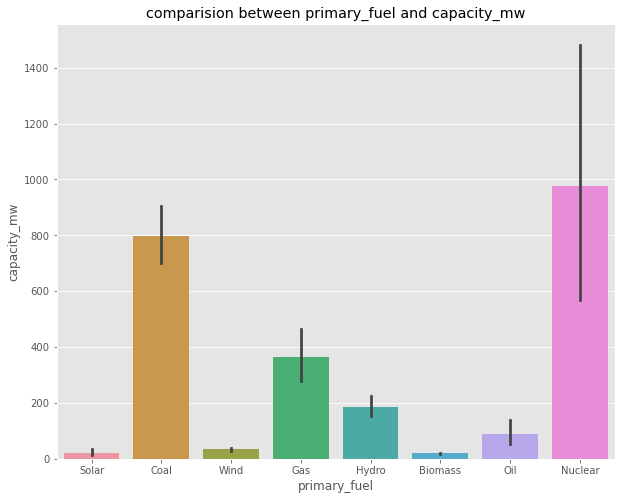

In [44]:
plt.figure(figsize=[10,8])
plt.title('comparision between primary_fuel and capacity_mw')
sns.barplot(df['primary_fuel'], df['capacity_mw'])

The plant uses Nuclear and Coal as fuel has high capacity than other plants uses other fuels

# Multivariate Analysis:

Checking the pairwise relation between features and label capacity in MW(megawatt)

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x00000202FDDB01F0>>

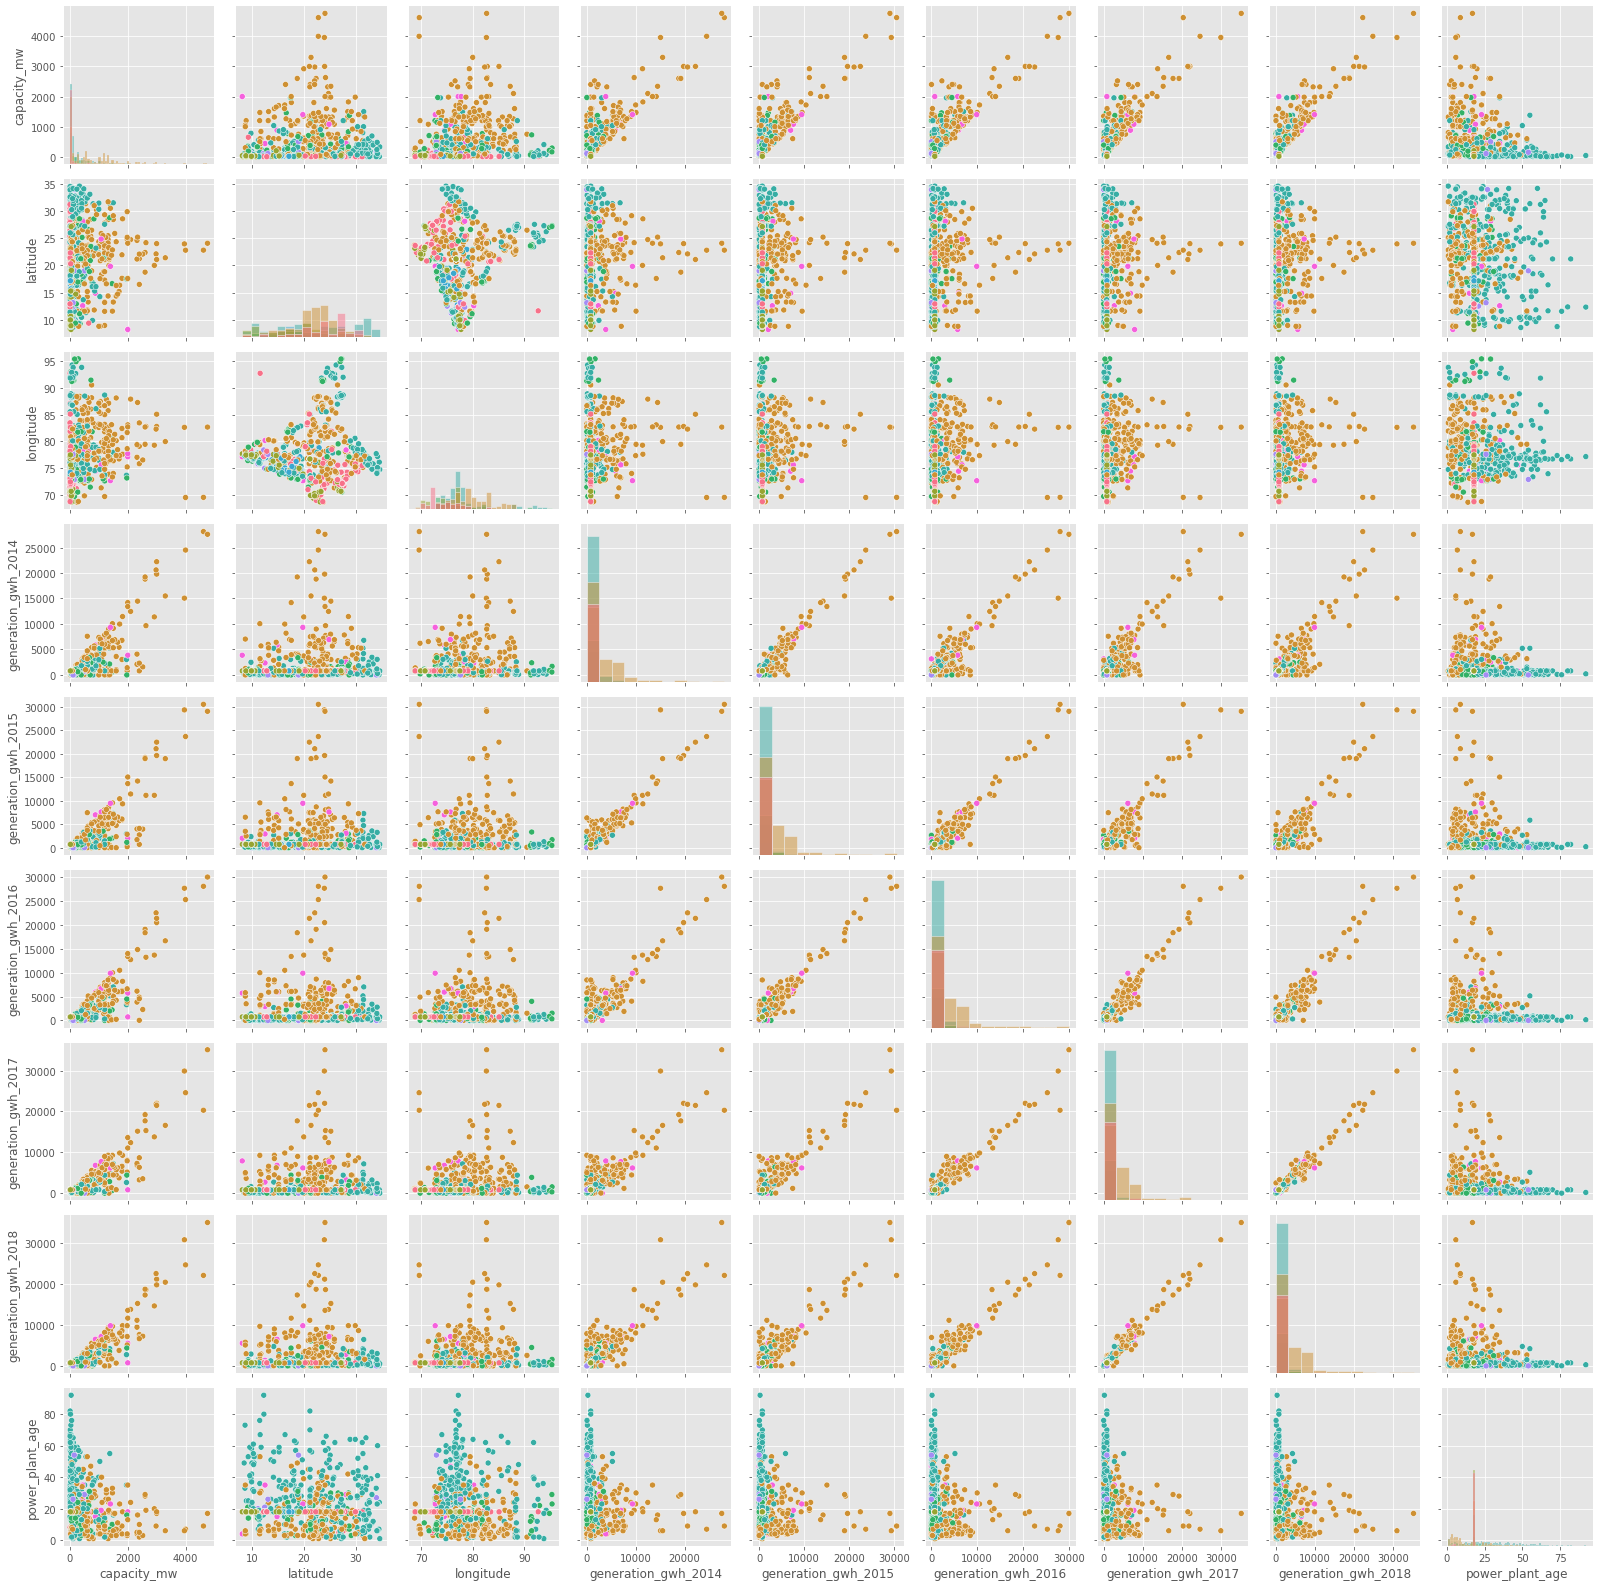

In [45]:
g= sns.PairGrid(df, hue='primary_fuel')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

<bound method Grid.add_legend of <seaborn.axisgrid.PairGrid object at 0x0000020284EBC100>>

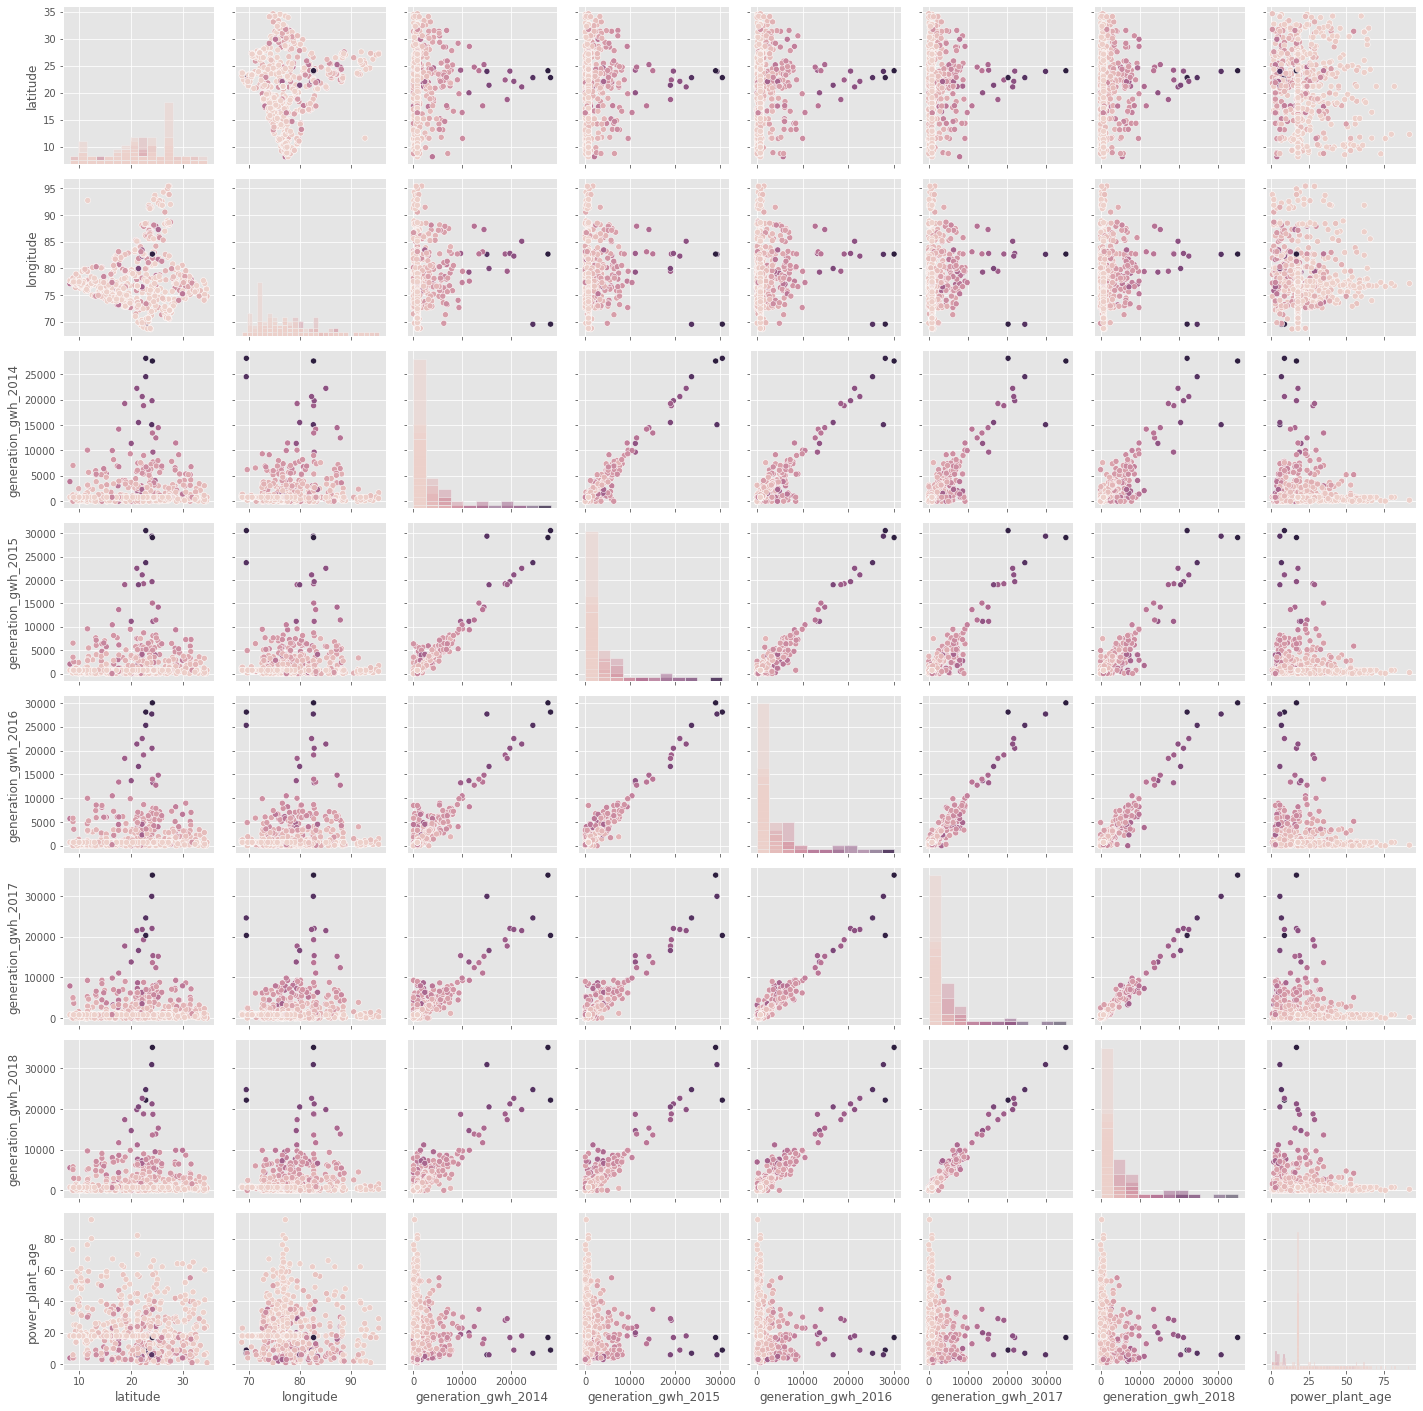

In [46]:
g= sns.PairGrid(df, hue='capacity_mw')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend

# Identifying the Outliers

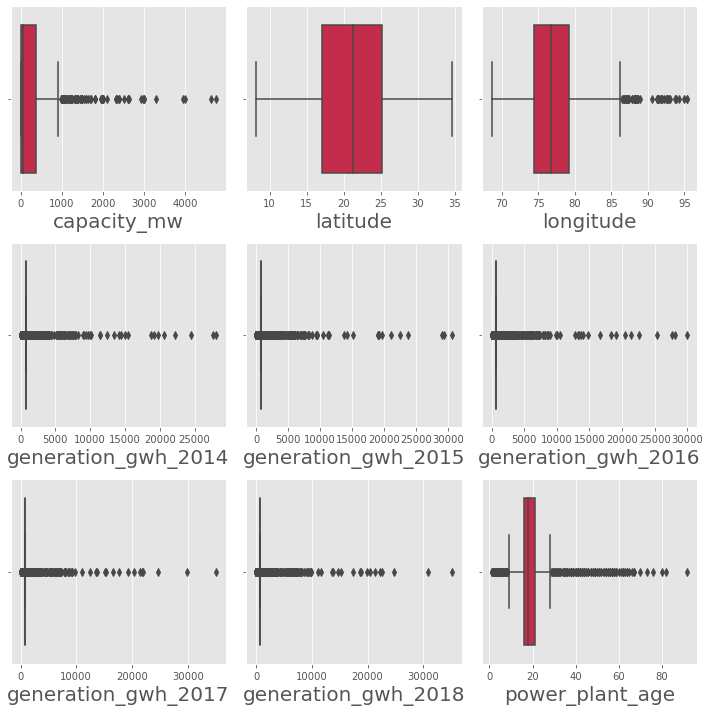

In [47]:
plt.figure(figsize=(10,10), facecolor= 'white')
plotnumber=1

for column in numerical_col:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.boxplot(df[column], color='crimson')
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

Capacity is my target no need to remove outliers from that column

# Removing Outliers

In [48]:
features=df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', 'power_plant_age']]

Using ZScore method to remove outliers

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,3.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,18.0


This is the new DataFrame after removing the outiers which has  rows and 13 columns

In [50]:
df.shape

(907, 13)

In [51]:
df_new.shape

(851, 13)

In [52]:
#Checking for data loss

data_loss=(907-851)/907*100
data_loss

6.174200661521499

using Zscore i have 6.17 data loss which is less than 10%

# Encoding the Categorical Columns using Label Encoding

In [53]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [54]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

df_new[categorical_col] = df_new[categorical_col].apply(LE.fit_transform)

In [55]:
df_new[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


# Correlation between the Target Variables and features using HeatMap

In [56]:
corr=df_new.corr()
corr

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


The above table gives the correlation between the depedent and independent varaibles. We can visualize by plotting heatmap

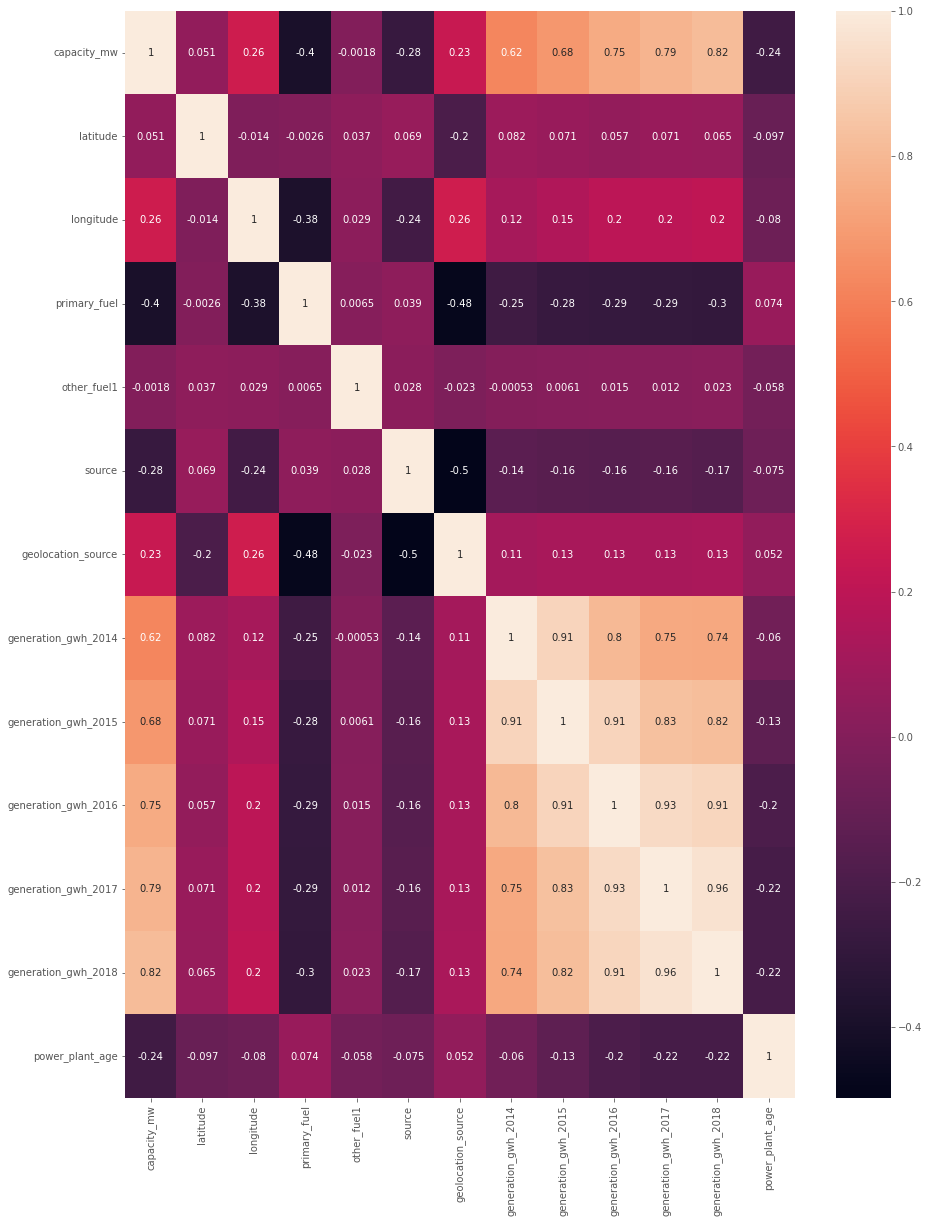

In [57]:
plt.figure(figsize= [15,20])
sns.heatmap(df_new.corr(), annot=True)
plt.show()

# Visualization the correlation between label(primary_fuel) and features  using barplot

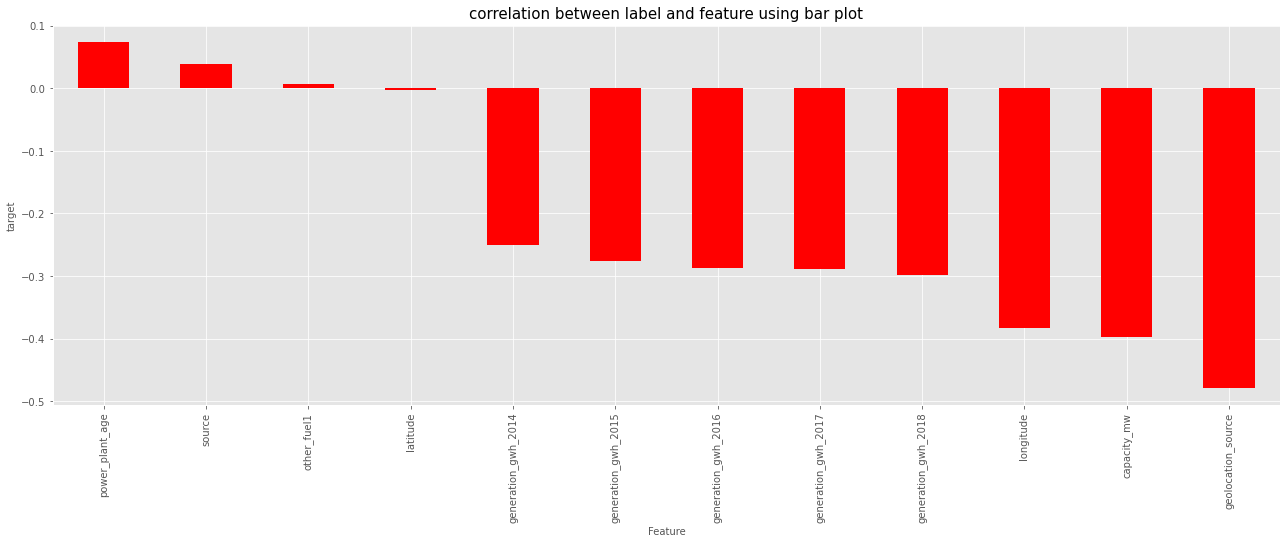

In [58]:
plt.figure(figsize=(22,7))
df_new.corr()['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot(kind='bar', color='r')
plt.xlabel('Feature', fontsize=10)
plt.ylabel('target', fontsize=10)
plt.title('correlation between label and feature using bar plot', fontsize=15)
plt.show()

other_fuel1 and latitude  is very less correlated with primary_fuel hence we can drop it

In [59]:
#Dropping the less correlated columns

df_new=df_new.drop(['other_fuel1'], axis=1)
df_new=df_new.drop(['latitude'], axis=1)

In [60]:
df_new.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,8.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,18.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,15.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,4.0


# 1: Prediction for Primary_fuel

seperating the features and labels into x and y

In [61]:
x=df_new.drop('primary_fuel', axis=1)
y=df_new['primary_fuel']

In [62]:
x.shape

(851, 10)

In [63]:
y.shape

(851,)

# checking for Skewness

In [64]:
x.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
power_plant_age        1.280800
dtype: float64

In [65]:
#checking for categorical columns, because for categorical columns we can skip the skewness

categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


Hence, we can ignore these coloumns 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source' as they are catrgorical

In [66]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)
    

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'power_plant_age']


Hence we have to remove the skewness from the numerical columns. In these columns we have dropped Latitude. 

# Removing Skewness using yeo_johnson method

In [67]:
skew=['capacity_mw', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'power_plant_age']

In [68]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [69]:
x[skew]=scaler.fit_transform(x[skew].values)
x[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


Checking skewness after using yeo-johnson method

In [70]:
x.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
power_plant_age        0.037156
dtype: float64

Hence, we have removed the skewness in all the numeric columns

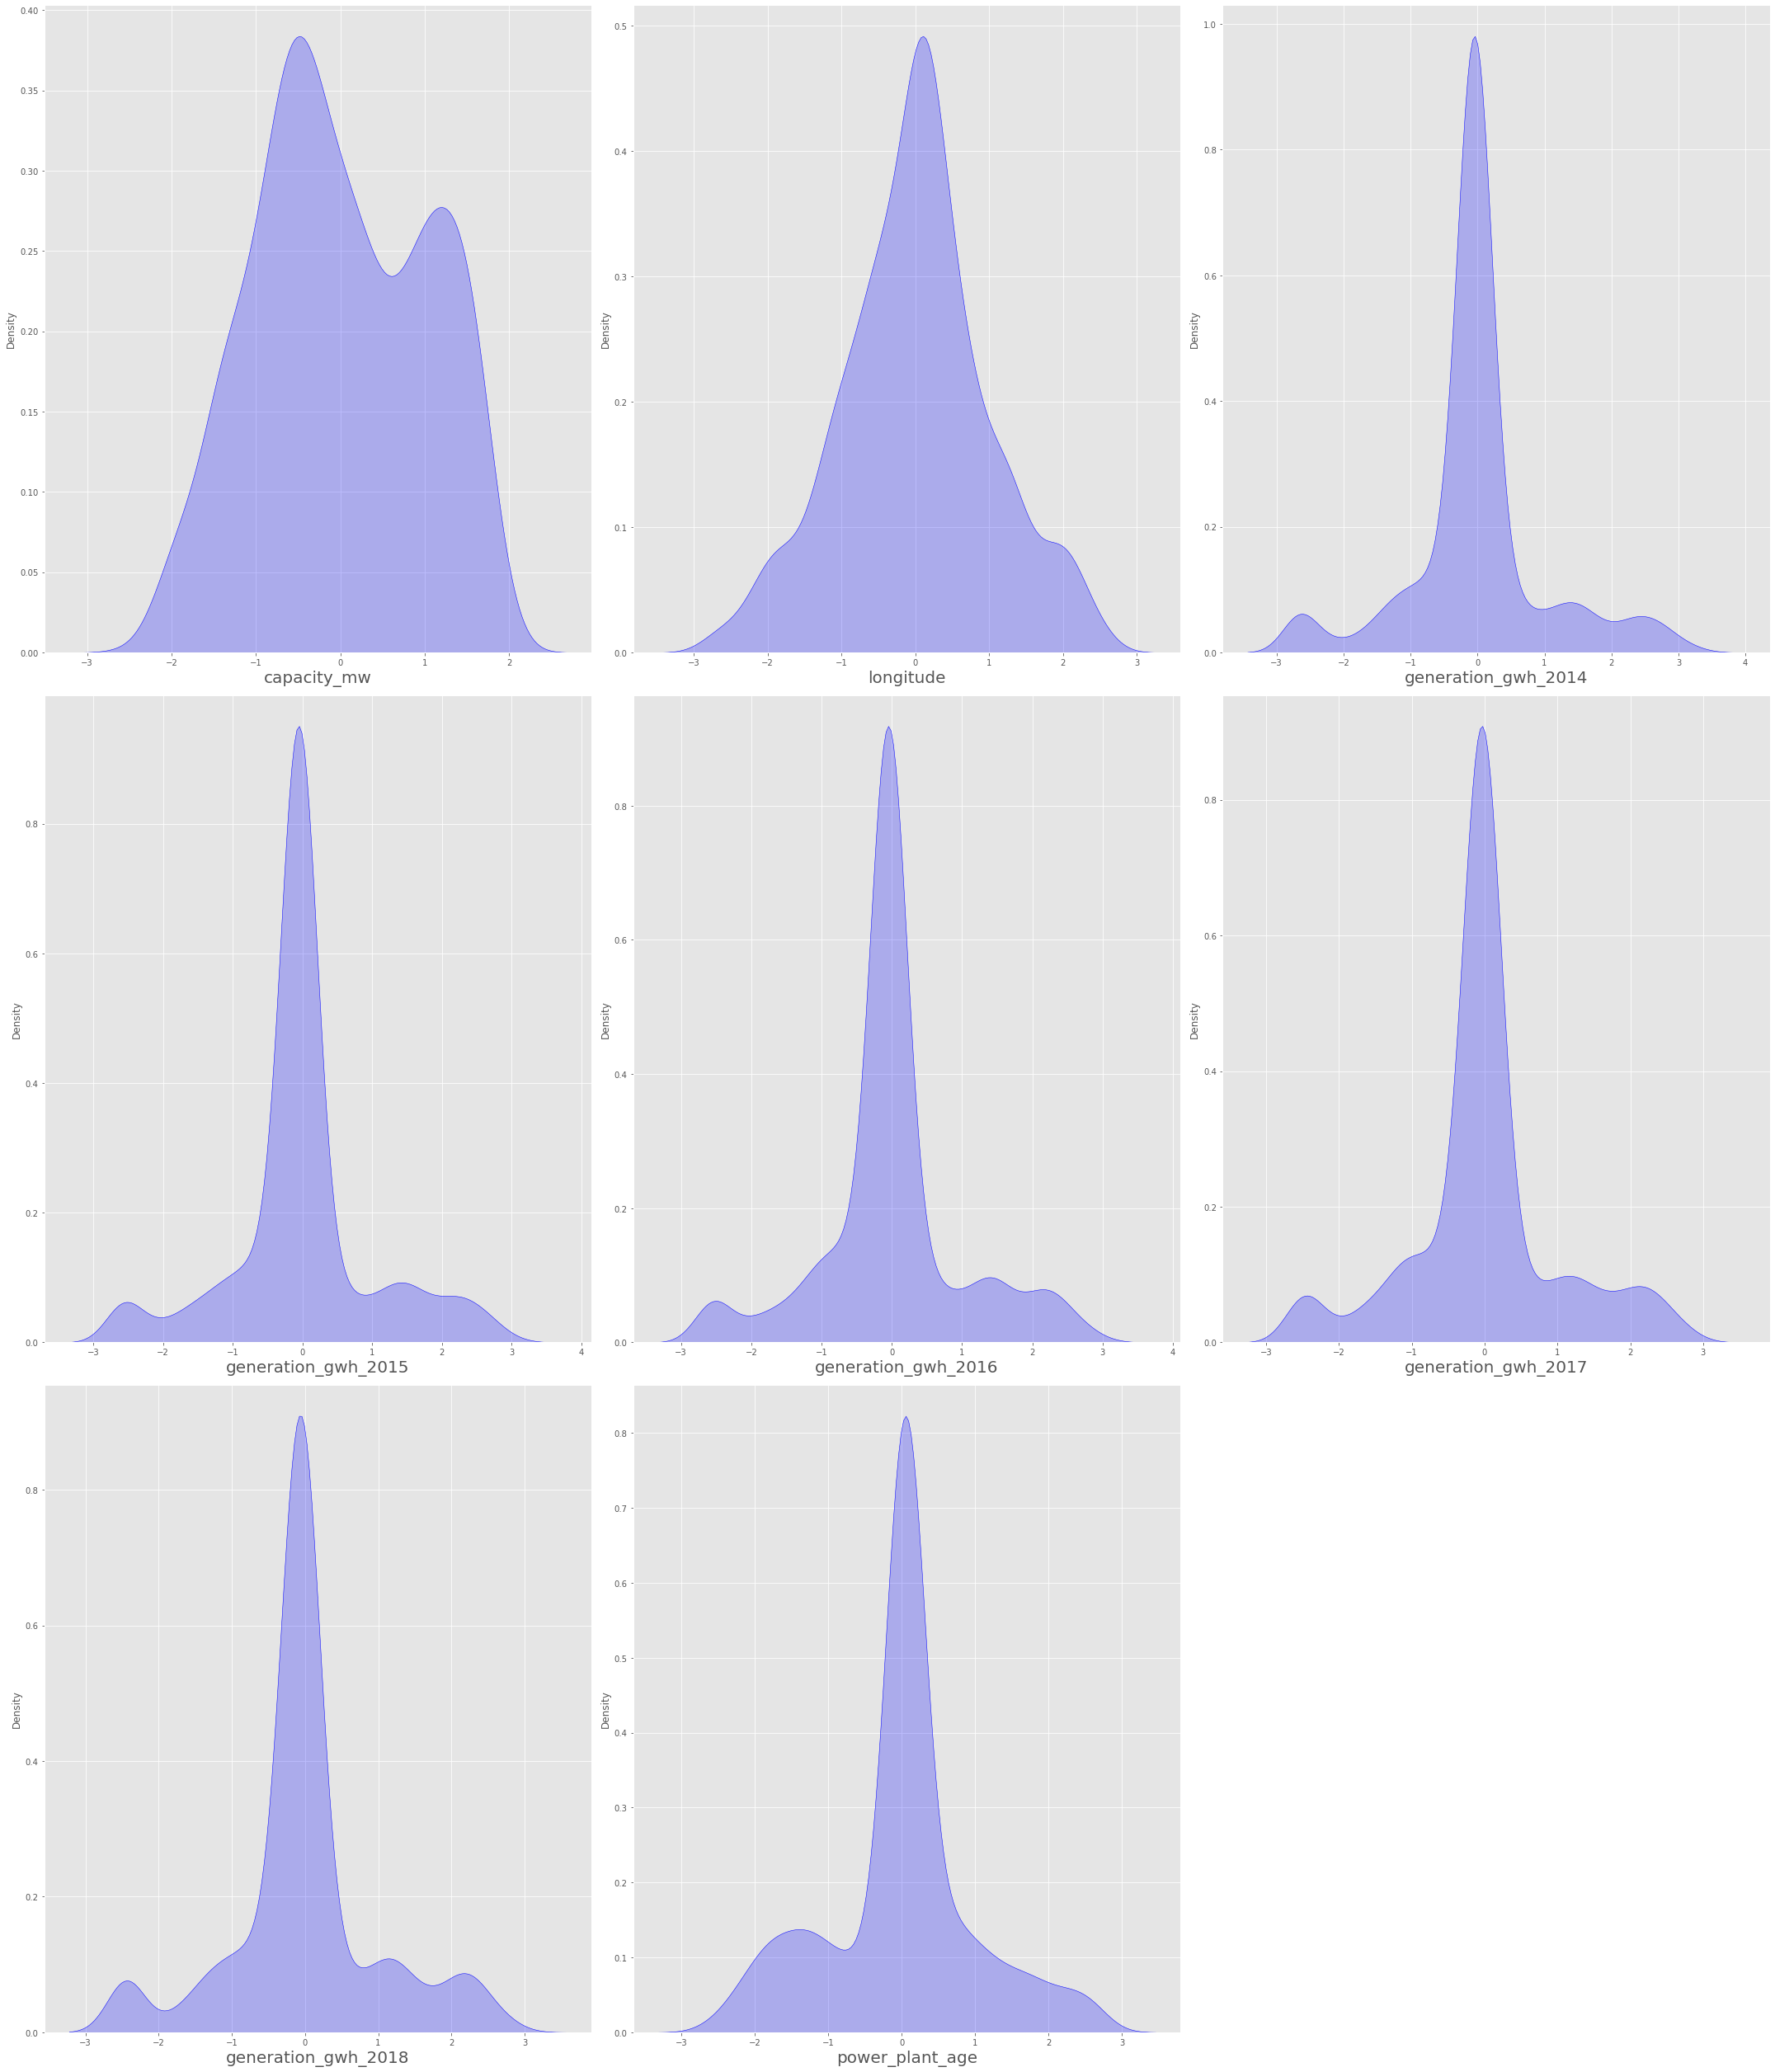

In [71]:
#now let us check how the data is distributed in all columns

plt.figure(figsize=(30,35), facecolor= 'white')
plotnumber=1

for column in x[skew]:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(x[column], color='b', kde_kws={"shade": True},hist=False)
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

# Scaling the Data using Standard Scaler

In [72]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.983360
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165


In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif values"]=[variance_inflation_factor(x.values, i) 
              for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,vif values,Features
0,1.812831,capacity_mw
1,1.193721,longitude
2,1.413003,source
3,1.590920,geolocation_source
4,3.623098,generation_gwh_2014
5,6.190488,generation_gwh_2015
6,9.960383,generation_gwh_2016
7,9.766254,generation_gwh_2017
8,8.960982,generation_gwh_2018
9,1.155462,power_plant_age


The VIF value is less than 10 in all the columns which means that we dont have multicolinearity problem

In [74]:
y.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

The data is not balanced. So we have to balanced the data by oversampling

# Oversampling the data

In [75]:
from imblearn.over_sampling import SMOTE

SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [76]:
y.value_counts()

6    238
1    238
7    238
2    238
3    238
0    238
5    238
4    238
Name: primary_fuel, dtype: int64

Hence, the data is balanced now

# DataFrame after datacleaning and preprocessing

In [77]:
x.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.091763
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.048165
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.246636
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.767567


We use Classifiaction as the target variable is discrete data

# Finding best Random State and Accuracy:

In [78]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=i)
    DTC=DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred=DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Best Accuracy is", maxAccu, "on Random_state", maxRs)

Best Accuracy is 0.9003496503496503 on Random_state 31


# Creating Train test Split

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=31)


We created the new train test split using random satae

# Decision Tree Classifier

In [100]:
#checking accuracy for decision tree classifier

DTC=DecisionTreeClassifier()
DTC.fit(x_train, y_train)

predDTC= DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test, predDTC))

0.8898601398601399
[[82  2  0  0  0  0  0  0]
 [ 7 42  5  6  1  0  0  0]
 [ 0  4 58  1  0  5  0  0]
 [ 0  3  5 62  2  0  0  0]
 [ 0  5  2  1 56  0  0  0]
 [ 2  5  5  2  0 68  0  0]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        84
           1       0.69      0.69      0.69        61
           2       0.77      0.85      0.81        68
           3       0.86      0.86      0.86        72
           4       0.95      0.88      0.91        64
           5       0.93      0.83      0.88        82
           6       1.00      1.00      1.00        63
           7       1.00      1.00      1.00        78

    accuracy                           0.89       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.89      0.89      0.89       572



Here we are getting 90% accuracy using DTC

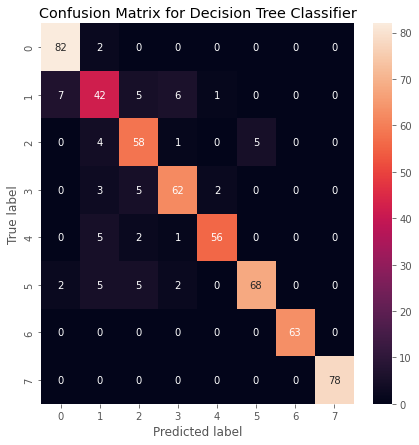

In [101]:
#lets plot confusion matrix for DTC

cm= confusion_matrix(y_test, predDTC)

x_axis_labels =['0','1','2','3','4','5','6','7']
y_axis_labels =['0','1','2','3','4','5','6','7']

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

RFC has 92% accuracy

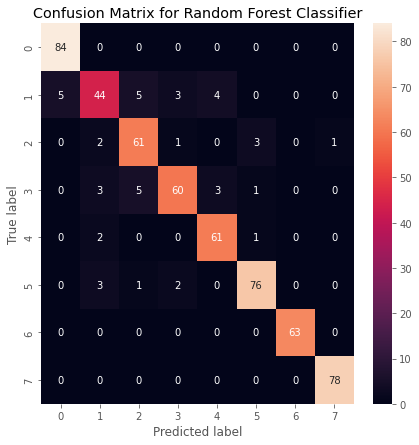

In [102]:
#lets plot confusion matrix for RFC

cm= confusion_matrix(y_test, predRFC)

x_axis_labels =['0','1','2','3','4','5','6','7']
y_axis_labels =['0','1','2','3','4','5','6','7']

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

# Support Vector Machine Classifier

In [103]:
#checking accuracy for Support Vector classifier

svc=SVC()
svc.fit(x_train, y_train)

predsvc= svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7884615384615384
[[73  0  0  0  0  0  0 11]
 [12 28  8  1  7  1  0  4]
 [ 1  4 45  1  2 13  0  2]
 [ 0  8 14 36  5  0  0  9]
 [ 0  0  0  0 64  0  0  0]
 [ 3  1  3  0  0 66  0  9]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  2  0  0  0  0 76]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        84
           1       0.68      0.46      0.55        61
           2       0.62      0.66      0.64        68
           3       0.95      0.50      0.65        72
           4       0.82      1.00      0.90        64
           5       0.82      0.80      0.81        82
           6       1.00      1.00      1.00        63
           7       0.68      0.97      0.80        78

    accuracy                           0.79       572
   macro avg       0.80      0.78      0.78       572
weighted avg       0.80      0.79      0.78       572



accuracy using SVC is 79%

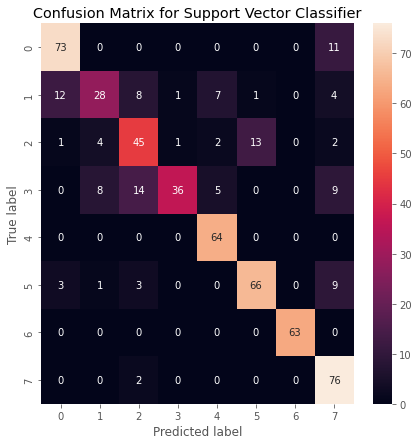

In [104]:
#lets plot confusion matrix for svc

cm= confusion_matrix(y_test, predsvc)

x_axis_labels =['0','1','2','3','4','5','6','7']
y_axis_labels =['0','1','2','3','4','5','6','7']

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

# KNeighbors Classifier

In [105]:
#checking accuracy for KNeighbors classifier

knn=KNN()
knn.fit(x_train, y_train)

predknn= knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.8601398601398601
[[83  0  0  0  0  0  0  1]
 [ 7 33  7  3  4  4  0  3]
 [ 0  4 53  0  0  9  0  2]
 [ 0  6 11 46  3  0  0  6]
 [ 0  0  0  2 62  0  0  0]
 [ 3  1  2  0  0 75  0  1]
 [ 0  0  0  0  0  0 63  0]
 [ 0  0  0  0  0  1  0 77]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        84
           1       0.75      0.54      0.63        61
           2       0.73      0.78      0.75        68
           3       0.90      0.64      0.75        72
           4       0.90      0.97      0.93        64
           5       0.84      0.91      0.88        82
           6       1.00      1.00      1.00        63
           7       0.86      0.99      0.92        78

    accuracy                           0.86       572
   macro avg       0.86      0.85      0.85       572
weighted avg       0.86      0.86      0.85       572



The accuracy using KNN is 86%

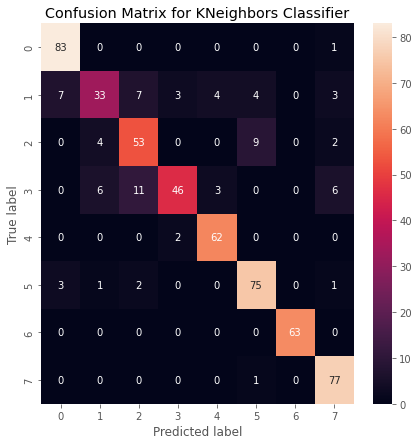

In [106]:
#lets plot confusion matrix for KNN

cm= confusion_matrix(y_test, predknn)

x_axis_labels =['0','1','2','3','4','5','6','7']
y_axis_labels =['0','1','2','3','4','5','6','7']

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for KNeighbors Classifier')
plt.show()

# Gradient Boosting Classifier

In [107]:
#checking accuracy for Gradient Boosting classifier

GB=GradientBoostingClassifier()
GB.fit(x_train, y_train)

predGB= GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.8933566433566433
[[84  0  0  0  0  0  0  0]
 [ 8 43  2  5  2  1  0  0]
 [ 0  3 55  5  0  5  0  0]
 [ 0  4 11 53  3  1  0  0]
 [ 0  0  0  0 63  1  0  0]
 [ 0  5  2  2  0 73  0  0]
 [ 0  1  0  0  0  0 62  0]
 [ 0  0  0  0  0  0  0 78]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        84
           1       0.77      0.70      0.74        61
           2       0.79      0.81      0.80        68
           3       0.82      0.74      0.77        72
           4       0.93      0.98      0.95        64
           5       0.90      0.89      0.90        82
           6       1.00      0.98      0.99        63
           7       1.00      1.00      1.00        78

    accuracy                           0.89       572
   macro avg       0.89      0.89      0.89       572
weighted avg       0.89      0.89      0.89       572



The accuarcy using GB is 90%

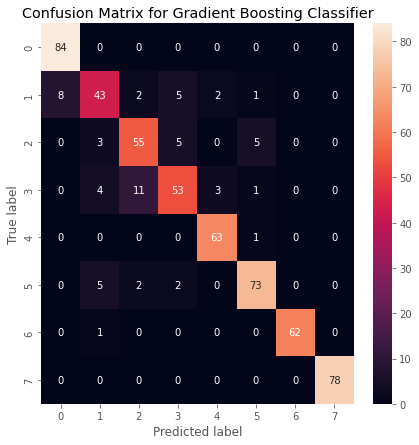

In [108]:
#lets plot confusion matrix for GB

cm= confusion_matrix(y_test, predGB)

x_axis_labels =['0','1','2','3','4','5','6','7']
y_axis_labels =['0','1','2','3','4','5','6','7']

f, ax =plt.subplots(figsize=(7,7))

sns.heatmap(cm, annot=True, fmt='.0f', ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Checking the Cross Validation Score

In [109]:
#cv score for DTC

print(cross_val_score(DTC, x,y, cv=5).mean())

0.8849937836717778


In [110]:
#cv score for RFC

print(cross_val_score(RFC, x,y, cv=5).mean())

0.9201671501588617


In [111]:
#cv score for SVC

print(cross_val_score(svc, x,y, cv=5).mean())

0.793065340516646


In [112]:
#cv score for KNN

print(cross_val_score(knn, x,y, cv=5).mean())

0.8550504213289128


In [113]:
#cv score for GB

print(cross_val_score(GB, x,y, cv=5).mean())

0.9059953032186765


By looking into the differece of model accuracy and cross validation score Gradient Boosting Classifier if the best model

# Hyper Parameter Tuning

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameters={'criterion':['friedman_mse','mse', 'mae'],
           'max_features':['auto','sqrt','log2'],
           'n_estimators':[0,200],
           'max_depth':[2,3,4,5,6,8]},

In [116]:
GCV=GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)

In [ ]:
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_

In [ ]:
primary_fuel=RandomForestClassifier (criterion='mae', max_depth=8, max_features='sqrt', n_estimators=200)
primary_fuel.fit(x_train, y_train)
pred =primary_fuel.predict(x_test)
acc=accuracy_score(y_test, pred)
print(acc*100)

# ROC AUC Curve:

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
classifier = OneVsRestClassifier(primary_fuel)
y_score= classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_test_bin= label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes=8

#compute roc and auc curve for all the classes
false_positive_rate =dict()
true_positive_rate= dict()
roc_auc=dict()

for i in range(n_classes):
    false_positive_rate[i],true_positive_rate[i],_ =roc_curve(y_test_bin[:, i], y_score[:,i])
    roc_auc[i]= auc(false_positive_rate[i],true_positive_rate[i])
    
    
for i in range(n_classes):
    plt.plotv(false_positive_rate[i],true_positive_rate[i], lw=2,
            label='ROC curve of class{0}(area={1:0.2f})'.format(i, roc_auc[i]))
    
plt.plot([0,1], [0,1], 'k--', lw=2)
plt.xlim([-0.05,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operation characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()



# Saving the Model for Primary Fuel

In [ ]:
import joblib
joblib.dump(primary_fuel, "Power_plant_primary_fuel.pkl")

# 2: Prediction for Capacity_MW

Seperating the features and label variables into x and y

In [ ]:
x1=df_new.drop("capacity_mw", axis=1)
y1=df_new['capacity_mw']

In [ ]:
x1.shape

In [ ]:
y1.shape

# Checking for Skewness

In [ ]:
x1.skew()

column source and geolocation source are categorical columns no need to remove the skewness from these columns
Except these two and primary_fuel column all the columns having skewness

# Removing Skewness using yeo_johnson method

In [ ]:
skew1=['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'power_plant_age']

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')

In [ ]:
x1[skew1]=scaler.fit_transform(x1[skew1].values)
x1[skew1].head()

In [ ]:
#checking skewness after removing using yeo-johnson method
x1.skew()

In [ ]:
#now let us check how the data is distributed in all columns

plt.figure(figsize=(30,35), facecolor= 'white')
plotnumber=1

for column in x1[skew1]:
    if plotnumber <=9:
        ax= plt.subplot(3,3, plotnumber)
        sns.distplot(x1[column], color='b', kde_kws={"shade": True},hist=False)
        plt.xlabel(column, fontsize=20)
        
        
    plotnumber +=1
plt.tight_layout()

# Feature Scaling using Standard Scalarization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x1= pd.DataFrame(scaler.fit_transform(x1), columns=x1.columns)
x1

To overcome the issue of data biasness I have scaled the data using standard scalarization

As we have observed in the map that there is multicolinearity exist in the data. So let us check the VIF values

# Checking VIF Values

In [ ]:
#finding the VIF values in each scaled column (x.shape[1])

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x1.values, i) 
              for i in range(len(x1.columns))]
vif["Features"]=x1.columns
vif

VIF value is less than 10 in all the columns which means that data doesn't have multicolinearity issue

In [ ]:
x1.head()

# Finding best Random State

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [ ]:
from sklearn.ensemble import RandomForestRegressor

maxAccu=0
maxRS=0

for i in range(1,200):
    x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.30, random_state=i)
    mod=RandomForestRegressor()
    mod.fit(x1_train, y1_train)
    pred=mod.predict(x1_test)
    acc=r2_score(y1_test, pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Maximum r2_score is", maxAccu, "on Random_state", maxRs)

In [ ]:
#Creating a new train test split



In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1, test_size=0.30, random_state=maxRS)


# Regression Algorithms

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Random Forest Regressor

In [ ]:
#checking accuracy for RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x1_train, y1_train)

predRFR= RFR.predict(x1_test)

print('R2_score:', r2_score(y1_test, predRFR))
print('MAE:',metrics.mean_absolute_error(y1_test, predRFR))
print('MSE:', metrics.mean_squared_error(y1_test, predRFR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test, predRFR)))

# Decision Tree Regressor

In [ ]:
#checking accuracy for decision tree classifier

DTR=DecisionTreeRegressor()
DTR.fit(x1_train, y1_train)

predDTR= DTR.predict(x1_test)

print('R2_score:', r2_score(y1_test, predDTR))
print('MAE:',metrics.mean_absolute_error(y1_test, predDTR))
print('MSE:', metrics.mean_squared_error(y1_test, predDTR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test, predDTR)))

# KNeighbors Regressor

In [ ]:
knn=KNN()
knn.fit(x1_train, y1_train)

predknn= knn.predict(x1_test)

print('R2_score:', r2_score(y1_test, predknn))
print('MAE:',metrics.mean_absolute_error(y1_test, predknn))
print('MSE:', metrics.mean_squared_error(y1_test, predknn))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test, predknn)))

# GradientBoosting Regressor

In [ ]:
GB=GradientBoostingRegressor()
GB.fit(x1_train, y1_train)

predGB= GB.predict(x1_test)

print('R2_score:', r2_score(y1_test, predGB))
print('MAE:',metrics.mean_absolute_error(y1_test, predGB))
print('MSE:', metrics.mean_squared_error(y1_test, predGB))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test, predGB)))

# BaggingRegressor

In [ ]:
BR=BaggingRegressor()
BR.fit(x1_train, y1_train)

predBR= BR.predict(x1_test)

print('R2_score:', r2_score(y1_test, predBR))
print('MAE:',metrics.mean_absolute_error(y1_test, predBR))
print('MSE:', metrics.mean_squared_error(y1_test, predBR))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y1_test, predBR)))

# Checking the Cross Validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# checking cv score for RandomForest Regressor

print(cross_val_score(RFR, x1,y1, cv=5).mean())

In [ ]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR, x1,y1, cv=5).mean())

In [ ]:
# checking cv score for KNeighbors Regressor
print(cross_val_score(knn, x1,y1, cv=5).mean())

In [ ]:
# checking cv score for GradientBoosting Regressor
print(cross_val_score(GB, x1,y1, cv=5).mean())

In [ ]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR, x1,y1, cv=5).mean())

From the above Observation, the difference between R2 Score and the Cross validation score. We can conclude that
KNN is our best fitting model. Now lets increase the accuracy of the model by using hyper parameter tuning

# Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#knn regresor
parameters={'n_neighbors':[2,3,4,5,6],
           'algorithm':['auto','ball_tree','kd_tree','brute'],
           'leaf_size':[10,20,30,40,50],
           'weights':['uniform','distance']},

In [ ]:
GCV=GridSearchCV(KNN(), parameters, cv=5)

In [ ]:
GCV.fit(x1_train, y1_train)

In [ ]:
GCV.best_params_

In [ ]:
capacity=KNN(algorithm='auto',leaf_size=30, n_neighbors=5, weights='distance')
capacity.fit(x1_train, y1_train)

pred=capacity.predict(x1_test)
print("RMSE Value:", np.sqrt(metrics.mean_squared_error(y1_test, predknn)))
print('R2_score:', r2_score(y1_test, predknn))

# Saving the Model

In [ ]:
import joblib
joblib.dump(capacity, "Global_Power_Plant_capacity_mw.pkl")